In [1]:
#Import Modules
import os
import deconvolution_tools.deconvolution_tools as dt
import numpy as np
import pandas as pd
import time as t
import sys
import define_ensembles as de
import h5py
import matplotlib.pyplot as plt
import networkx as nx
import EnsembleCorrelationFunctions as ecf
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
reload(ecf)

<module 'EnsembleCorrelationFunctions' from 'EnsembleCorrelationFunctions.pyc'>

In [49]:
def exp_to_ensembles(boc,ophys_experiment_id, stimulus, verbose=False):
    start_time = t.time()
    if verbose:
        dataset = boc.get_ophys_experiment_data(ophys_experiment_id=ophys_experiment_id)
        print str(dataset.number_of_cells) + ' Neurons in Experiment'
        plt.imshow(dataset.get_max_projection())
        plt.show()
    
    spikes, timestamps, spike_times, isis = dt.get_epoch_spiking_data(boc, ophys_experiment_id,num_std=5)
    
    if verbose:
        print('Spikes determined – ' + str(t.time()-start_time) +' elapsed')
        dt.plot_raster(spike_times[stimulus], title=str(ophys_experiment_id) + '_' +stimulus)
    
    info = []
    info.append(timestamps)
    info.append(spike_times)
    
    time, spktms, cellID = de.get_ensemble_info(info, stimulus)
    
    T = np.array([time[0],time[-1]])

    
    time, ensembles = de.find_high_activity(spktms, T, dt=0.005, binsize=0.5, nsurr=1000, pval=0.05) 
    
    if verbose:
        print('high frequency frames determined – ' + str(t.time()-start_time) +' elapsed')
        print 'Number of high frequency frames: ' + str(len(ensembles[1]))

        plt.imshow(ensembles)

    
    ensemble_matrix, above_thresh_ensembles_boot, z_values_boot = ecf.correlations_between_ensembles(
        ensemble_array=ensembles,surr_num=100,percentile=95,verbose=verbose)
    

    
    if verbose:
        print('Ensemble matrix determined – ' + str(t.time()-start_time) +' elapsed')
    
    cliques = ecf.get_correlation_cliques(ensembles,above_thresh_ensembles_boot,verbose=verbose)
    
    CE_final = ecf.get_unique_core_ensembles(ensembles,cliques,95)
   
    

    if verbose:
        ecf.summary_stats(ensembles,cliques,CE_final,verbose=verbose)
        print('Core Ensembles determined – ' + str(t.time()-start_time) +' elapsed')
    
    
    return CE_final


In [46]:
reload(ecf)

<module 'EnsembleCorrelationFunctions' from 'EnsembleCorrelationFunctions.py'>

11 Neurons in Experiment


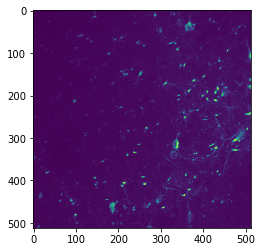

Spikes determined – 3.02439594269 elapsed


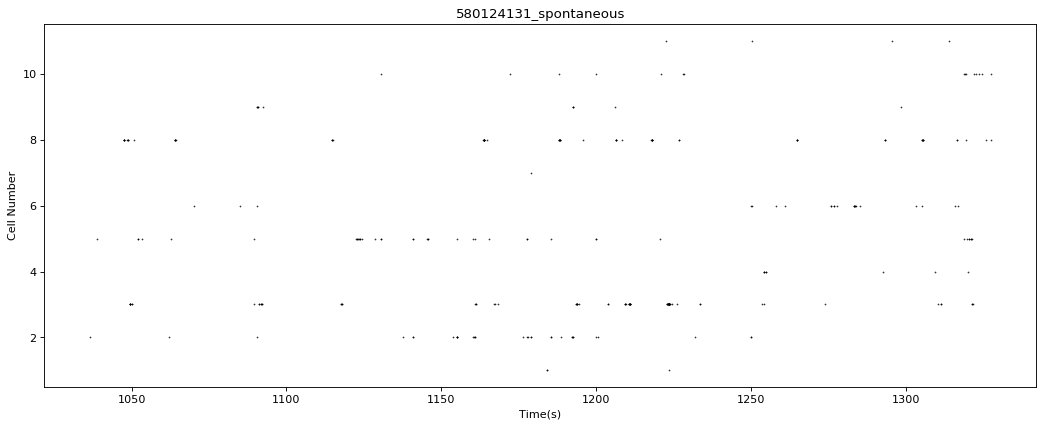

high frequency frames determined – 6.96333312988 elapsed
Number of high frequency frames: 26
verbose = True


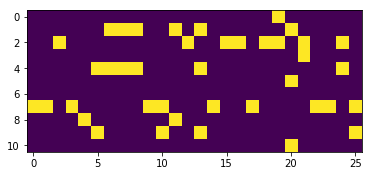

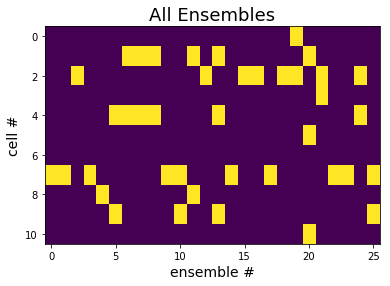

('Total number of permutations ', (325,))
('zip permutations example of first 300: ', [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3), (20, 3), (21, 3), (22, 3), (23, 3), (24, 3), (25, 3), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (15, 4), (16

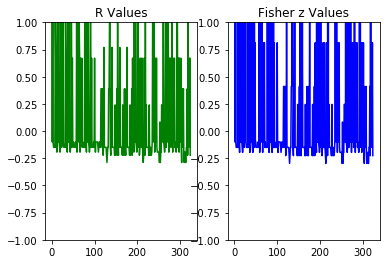

('Elapsed surrogate time (s): ', 3.3618569374084473)

('Pairs above threshold (z): ', (15, 2))
[[ 1  3 18 17 13  7  8 13  8 13 14 17 23 25 24]
 [ 0  1  2  3  5  6  6  6  7  8 10 10 10 10 16]]

('Fisher-z values above threshold: ', (15,))
[ 18.36840028  18.36840028  18.36840028  18.36840028   1.01983755
  18.36840028  18.36840028   1.01983755  18.36840028   1.01983755
   0.81223326   0.81223326   0.81223326  18.36840028   0.81223326]


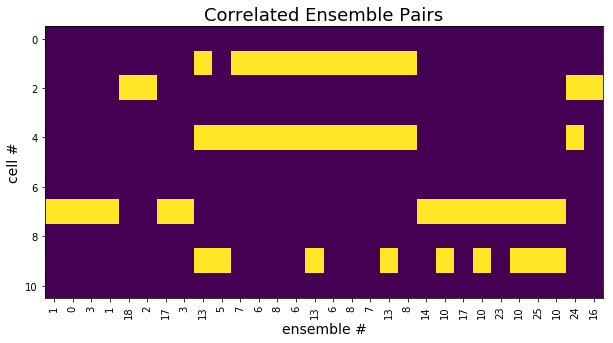

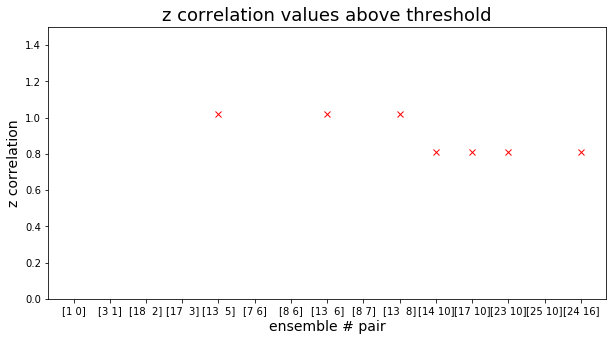

Ensemble matrix determined – 11.7713150978 elapsed
First 50 Pairs: 
[(1, 0), (3, 1), (18, 2), (17, 3), (13, 5), (7, 6), (8, 6), (13, 6), (8, 7), (13, 8), (14, 10), (17, 10), (23, 10), (25, 10), (24, 16)]
('Full size of pairs:', 15)

('Elapsed time:', 0.00016498565673828125)
('Number of cliques: ', 12)

The first few cliques: (clique # in first column)
[0, [0, 1]]
[1, [1, 3]]

('Shape of sample ensemble: ', (11, 2))
('Example percentile cutoff: ', 0.0)

('Number of core ensembles, same as number of cliques: ', 12)
('Number of unique core ensembles: ', 5)
Core Ensembles determined – 12.243211031 elapsed


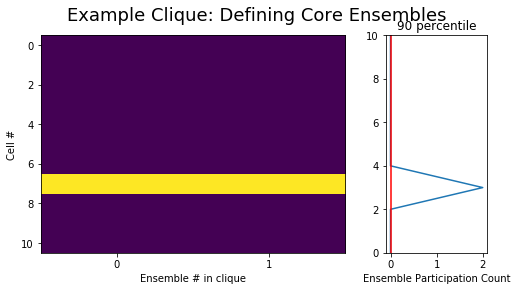

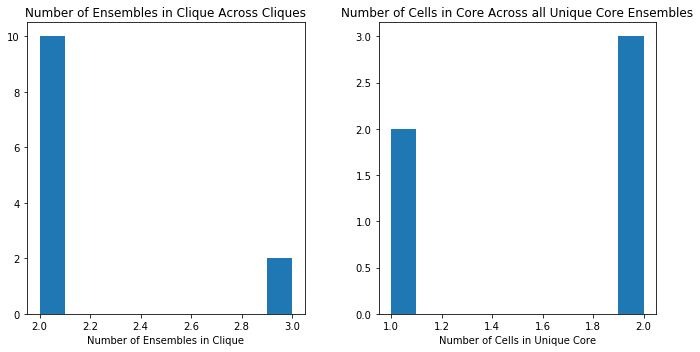

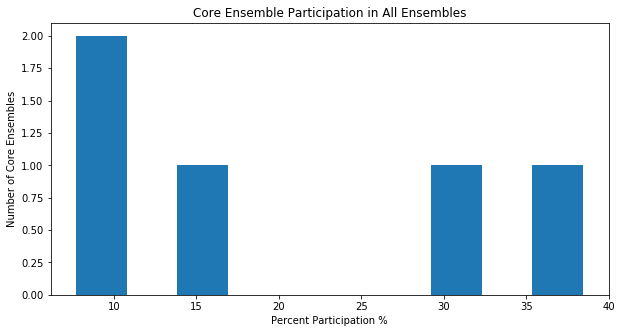

In [51]:
ophys_experiment_id = 580124131
stimulus = 'spontaneous'
CE_final = exp_to_ensembles(boc,ophys_experiment_id, stimulus,verbose=True)

In [52]:
ce_final.shape

NameError: name 'ce_final' is not defined

In [8]:
#Set Drive Path
drive_path = '/Volumes/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache/'


In [9]:
#Get BrainObservatoryCache
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_file = os.path.join(drive_path,'brain_observatory_manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

11

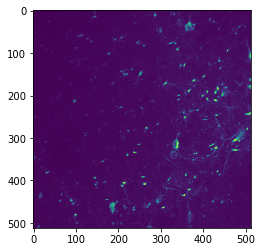

In [10]:
#Select Ophys experiment
ophys_experiment_id = 580124131 #example experiment
dataset = boc.get_ophys_experiment_data(ophys_experiment_id)
plt.imshow(dataset.get_max_projection())
dataset.number_of_cells

In [6]:
#Get spiking data for each stimulus epoch in ophys_experiment_id


/Users/perryspratt/anaconda/lib/python2.7/site-packages/OASIS/functions.py:15: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [25]:
reload(de)

T = np.array([time[0],time[-1]])

#using defaults here.  Adjust inputs for your desired data set. 
time, ensembles = de.find_high_activity(spktms, T, dt=0.005, binsize=0.5, nsurr=1000, pval=0.05) 

44


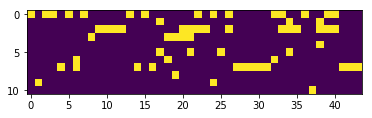

In [30]:
num_ensembles_ns = ensembles.shape[1]
print num_ensembles_ns
plt.imshow(ensembles)
plt.show()